Types of clustering algorithms:
- centroid-based (k-means, Mean-Shift)
- density-based (DBSCAN, OPTICS)
- distribution-based (Gaussian Mixture Model algorithm) 
- hiearchical (BIRCH, Agglomerative Clustering)
spectral and affinity propagation 
ADD "HEAVINESS"

<b>Affinity Propagation</b>
Every two data points are compared to determine their similarity. Data points keep exchanging information until clusters emerge. "Real-valued messages are exchanged between data points until a high-quality set of exemplars and corresponding clusters gradually emerges. We used affinity propagation to cluster images of faces, detect genes in microarray data, identify representative sentences in this manuscript, and identify cities that are efficiently accessed by airline travel."

The main configuration to tune is the “damping” set between 0.5 and 1.Damping factor (between 0.5 and 1) is the extent to which the current value is maintained relative to incoming values (weighted 1 - damping). This in order to avoid numerical oscillations when updating these values (messages).

Preferences for each point - points with larger values of preferences are more likely to be chosen as exemplars. The number of exemplars, ie of clusters, is influenced by the input preferences value. If the preferences are not passed as arguments, they will be set to the median of the input similarities.

<b>Affinity Propagation is a clustering method that next to qualitative cluster, also determines the number of clusters, k, for you.</b>
 

/Users/kaya/opt/anaconda3/lib/python3.8/site-packages/sklearn/cluster/_affinity_propagation.py:148: FutureWarning: 'random_state' has been introduced in 0.23. It will be set to None starting from 1.0 (renaming of 0.25) which means that results will differ at every function call. Set 'random_state' to None to silence this warning, or to 0 to keep the behavior of versions <0.23.
  warnings.warn(


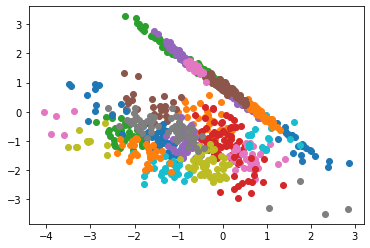

In [1]:
%matplotlib inline

# affinity propagation clustering
from numpy import unique
from numpy import where
from sklearn.datasets import make_classification
from sklearn.cluster import AffinityPropagation
from matplotlib import pyplot
# define dataset
X, _ = make_classification(n_samples=1000, n_features=4, n_informative=3, n_redundant=1, n_clusters_per_class=1, random_state=40)
# define the model
model = AffinityPropagation(damping=0.9)
# fit the model
model.fit(X)
# assign a cluster to each example
yhat = model.predict(X)
# retrieve unique clusters
clusters = unique(yhat)
# create scatter plot for samples from each cluster
for cluster in clusters:
    # get row indexes for samples with this cluster
    row_ix = where(yhat == cluster)
    # create scatter of these samples
    pyplot.scatter(X[row_ix, 0], X[row_ix, 1])
# show the plot
pyplot.show()

In [10]:
clusters

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
       17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27])

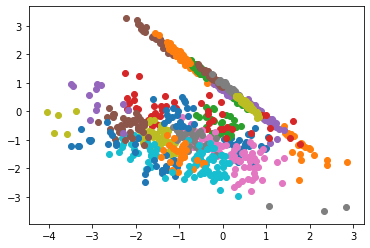

In [11]:
model = AffinityPropagation(damping=0.5)
# fit the model
model.fit(X)
# assign a cluster to each example
yhat = model.predict(X)
# retrieve unique clusters
clusters = unique(yhat)
# create scatter plot for samples from each cluster
for cluster in clusters:
    # get row indexes for samples with this cluster
    row_ix = where(yhat == cluster)
    # create scatter of these samples
    pyplot.scatter(X[row_ix, 0], X[row_ix, 1])
# show the plot
pyplot.show()

In [12]:
clusters

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
       17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31])

Estimated number of clusters: 3
Homogeneity: 0.872
Completeness: 0.872
V-measure: 0.872
Adjusted Rand Index: 0.912
Adjusted Mutual Information: 0.871
Silhouette Coefficient: 0.753


/opt/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:746: FutureWarning: The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.
  FutureWarning)


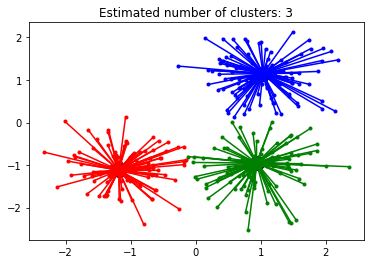

In [2]:
from sklearn.cluster import AffinityPropagation
from sklearn import metrics
from sklearn.datasets import make_blobs
%matplotlib inline

# #############################################################################
# Generate sample data
centers = [[1, 1], [-1, -1], [1, -1]]
X, labels_true = make_blobs(n_samples=300, centers=centers, cluster_std=0.5,
                            random_state=0)

# #############################################################################
# Compute Affinity Propagation
af = AffinityPropagation(preference=-50).fit(X)
cluster_centers_indices = af.cluster_centers_indices_
labels = af.labels_

n_clusters_ = len(cluster_centers_indices)

print('Estimated number of clusters: %d' % n_clusters_)
print("Homogeneity: %0.3f" % metrics.homogeneity_score(labels_true, labels))
print("Completeness: %0.3f" % metrics.completeness_score(labels_true, labels))
print("V-measure: %0.3f" % metrics.v_measure_score(labels_true, labels))
print("Adjusted Rand Index: %0.3f"
      % metrics.adjusted_rand_score(labels_true, labels))
print("Adjusted Mutual Information: %0.3f"
      % metrics.adjusted_mutual_info_score(labels_true, labels))
print("Silhouette Coefficient: %0.3f"
      % metrics.silhouette_score(X, labels, metric='sqeuclidean'))

# #############################################################################
# Plot result
import matplotlib.pyplot as plt
from itertools import cycle
%matplotlib inline

plt.close('all')
plt.figure(1)
plt.clf()

colors = cycle('bgrcmykbgrcmykbgrcmykbgrcmyk')
for k, col in zip(range(n_clusters_), colors):
    class_members = labels == k
    cluster_center = X[cluster_centers_indices[k]]
    plt.plot(X[class_members, 0], X[class_members, 1], col + '.')
    plt.plot(cluster_center[0], cluster_center[1], 'o', markerfacecolor=col,
             markeredgecolor='k', markersize=14)
    for x in X[class_members]:
        plt.plot([cluster_center[0], x[0]], [cluster_center[1], x[1]], col)

plt.title('Estimated number of clusters: %d' % n_clusters_)
plt.show()

<b>Agglomerative Clustering</b>

Agglomerative Clustering merges closest data points until the desired amount of clusters is achieved. More complex variations use things like mean distance between clusters, or distance between cluster centroids etc. to determine which cluster to merge. 

When the hierarcy is ready, the level of cut, or "n_clusters" can be selected. 

<p>Parameters</p>

<p><b>n_clusters</b></p>

<p><b>affinity</b>: str or callable, default=’euclidean’
Metric used to compute the linkage. Can be <b>“euclidean”, “l1”, “l2”, “manhattan”, “cosine”, or “precomputed”</b>. If linkage is “ward”, only “euclidean” is accepted. </p>

<p><b>linkage{‘ward’, ‘complete’, ‘average’, ‘single’}</b>, default=’ward’
Which linkage criterion to use. The linkage criterion determines which distance to use between sets of observation. The algorithm will merge the pairs of cluster that minimize this criterion.
<p>‘ward’ minimizes the variance of the clusters being merged.</p>
<p>‘average’ uses the average of the distances of each observation of the two sets.</p>
<p>‘complete’ or ‘maximum’ linkage uses the maximum distances between all observations of the two sets.</p>
<p>‘single’ uses the minimum of the distances between all observations of the two sets.</p>

<p><b>distance_threshold</b></p>

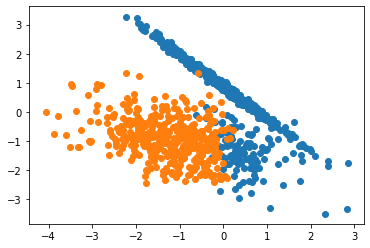

In [16]:
from sklearn.datasets import make_classification
from sklearn.cluster import AgglomerativeClustering
from matplotlib import pyplot
# define dataset
# define the model
model = AgglomerativeClustering(n_clusters=2)
# fit model and predict clusters
yhat = model.fit_predict(X)
# retrieve unique clusters
clusters = unique(yhat)
# create scatter plot for samples from each cluster
for cluster in clusters:
	# get row indexes for samples with this cluster
	row_ix = where(yhat == cluster)
	# create scatter of these samples
	pyplot.scatter(X[row_ix, 0], X[row_ix, 1])
# show the plot
pyplot.show()

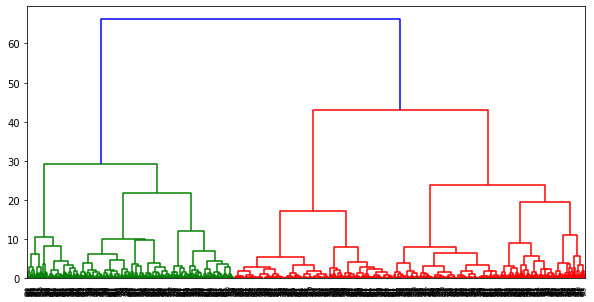

In [30]:
import matplotlib.pyplot as plt
import scipy.cluster.hierarchy as sch


model = AgglomerativeClustering(compute_full_tree=True, distance_threshold=0, 
                                n_clusters=None)
model = model.fit_predict(X)



plt.figure(figsize=(10,5))
dend = sch.dendrogram(sch.linkage(X, method='ward'))
plt.show()

#from this dendogram we conclude that 2 is the optimal number of clusters

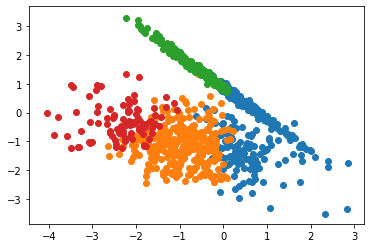

In [14]:
model = AgglomerativeClustering(n_clusters=4)
# fit model and predict clusters
yhat = model.fit_predict(X)
# retrieve unique clusters
clusters = unique(yhat)
# create scatter plot for samples from each cluster
for cluster in clusters:
	# get row indexes for samples with this cluster
	row_ix = where(yhat == cluster)
	# create scatter of these samples
	pyplot.scatter(X[row_ix, 0], X[row_ix, 1])
# show the plot
pyplot.show()

<b>BIRCH</b> Clustering (BIRCH is short for Balanced Iterative Reducing and Clustering using
Hierarchies) involves constructing a tree structure from which cluster centroids are extracted. It is especially suitable for very large databases.

Parameters 
- threshold: float, default=0.5
<b>The radius of the subcluster obtained by merging a new sample and the closest subcluster should be lesser than the threshold.</b> Otherwise a new subcluster is started. Setting this value to be very low promotes splitting and vice-versa.

- n_clusters: int, instance of sklearn.cluster model, default=3
Number of clusters after the final clustering step, which treats the subclusters from the leaves as new samples.None : the final clustering step is not performed and the subclusters are returned as they are.sklearn.cluster Estimator : If a model is provided, the model is fit treating the subclusters as new samples and the initial data is mapped to the label of the closest subcluster.int : the model fit is Agglomerative Clustering with n_clusters set to be equal to the int.


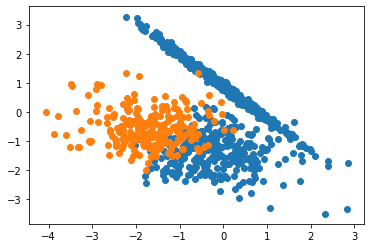

In [51]:
from sklearn.cluster import Birch
X, _ = make_classification(n_samples=1000, n_features=4, n_informative=3, n_redundant=1, n_clusters_per_class=1, random_state=40)

model = Birch(threshold=0.8, n_clusters=2)
# fit the model
model.fit(X)
# assign a cluster to each example
yhat = model.predict(X)
# retrieve unique clusters
clusters = unique(yhat)
# create scatter plot for samples from each cluster
for cluster in clusters:
	# get row indexes for samples with this cluster
	row_ix = where(yhat == cluster)
	# create scatter of these samples
	pyplot.scatter(X[row_ix, 0], X[row_ix, 1])
# show the plot
pyplot.show()

<b>DBSCAN</b>

DBSCAN Clustering (where DBSCAN is short for Density-Based Spatial Clustering of Applications with Noise) involves finding high-density areas in the domain and expanding those areas of the feature space around them as clusters.

Parameters:
- eps: float, default=0.5 
<b>The maximum distance between two samples for one to be considered as in the neighborhood of the other.</b> It may affect the resulting number of clusters.

- min_samples: int, default=5
The number of samples (or total weight) in a neighborhood for a point to be considered as a core point. This includes the point itself.

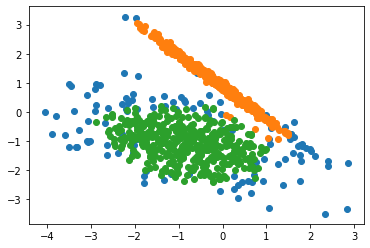

In [10]:
from sklearn.cluster import DBSCAN
from numpy import unique
from numpy import where
from sklearn.datasets import make_classification
from matplotlib import pyplot
%matplotlib inline

X, labels_true = make_classification(n_samples=1000, n_features=4, n_informative=3, n_redundant=1, n_clusters_per_class=1, random_state=40)

model = DBSCAN(eps=0.70, min_samples=20)
# fit model and predict clusters
yhat = model.fit_predict(X)
# retrieve unique clusters
clusters = unique(yhat)
# create scatter plot for samples from each cluster
for cluster in clusters:
	# get row indexes for samples with this cluster
	row_ix = where(yhat == cluster)
	# create scatter of these samples
	pyplot.scatter(X[row_ix, 0], X[row_ix, 1])
# show the plot
pyplot.show()

In [4]:
labels = model.labels_


In [8]:
import numpy as np
from sklearn import metrics
# identify core samples
core_samples = np.zeros_like(labels, dtype=bool)
core_samples[model.core_sample_indices_] = True
print(core_samples)

[ True  True False False  True False False  True  True  True False  True
  True False  True False  True False  True False  True  True  True  True
 False  True  True False  True  True  True False  True False  True  True
  True False  True  True  True  True  True False  True  True  True  True
 False  True False False  True  True  True False  True False  True  True
  True  True  True  True False  True  True  True  True False False  True
  True False False  True  True  True False False  True  True False  True
  True  True  True  True  True False False False  True False False  True
  True False False  True False  True  True  True  True  True  True False
 False False False  True  True False False False  True  True  True  True
  True False  True  True  True  True False  True  True  True False False
 False  True False False  True  True  True  True  True False  True  True
  True  True  True False  True False  True  True  True  True  True  True
  True  True False  True  True False  True  True Fa

In [13]:
# Number of clusters in labels, ignoring noise if present.
n_clusters_ = len(set(labels)) - (1 if -1 in labels else 0)
n_noise_ = list(labels).count(-1)

print('Estimated number of clusters: %d' % n_clusters_)
print('Estimated number of noise points: %d' % n_noise_)
print("Homogeneity: %0.3f" % metrics.homogeneity_score(labels_true, labels))

#Homogeneity metric of a cluster labeling given a ground truth.A clustering result satisfies 
#homogeneity if all of its clusters contain only data points which are members of a single class.
#ranges from 0 to 1, 1 - total homogeneity
#Однородность

print("Completeness: %0.3f" % metrics.completeness_score(labels_true, labels))

#Completeness metric of a cluster labeling given a ground truth.A clustering result satisfies 
#completeness if all the data points that are members of a given class are elements of the same cluster.
#ranges from 0 to 1, 1 - total homogeneity
#Полнота

print("V-measure: %0.3f" % metrics.v_measure_score(labels_true, labels))

#V-measure cluster labeling given a ground truth.This score is identical to 
#normalized_mutual_info_score with the 'arithmetic' option for averaging.
#The V-measure is the harmonic mean between homogeneity and completeness.
    
print("Adjusted Rand Index: %0.3f"
      % metrics.adjusted_rand_score(labels_true, labels))

#The Rand Index computes a similarity measure between two clusterings by considering 
#all pairs of samples and counting pairs that are assigned in the same or different clusters 
#in the predicted and true clusterings.
#ranges -1 to 1, 0 - random clustering, 1 - perfect match

print("Adjusted Mutual Information: %0.3f"
      % metrics.adjusted_mutual_info_score(labels_true, labels))

#Adjusted Mutual Information (AMI) is an adjustment of the Mutual Information (MI) score 
#to account for chance. It accounts for the fact that the MI is generally higher for two 
#clusterings with a larger number of clusters, regardless of whether there is actually more 
#information shared.
#from negative to 1 for perfect match

print("Silhouette Coefficient: %0.3f"
      % metrics.silhouette_score(X, labels))

#The best value is 1 and the worst value is -1. Values near 0 indicate overlapping clusters.

Estimated number of clusters: 2
Estimated number of noise points: 117
Homogeneity: 0.889
Completeness: 0.637
V-measure: 0.742
Adjusted Rand Index: 0.781
Adjusted Mutual Information: 0.636
Silhouette Coefficient: 0.388


/opt/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:746: FutureWarning: The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.
  FutureWarning)


Silhouette Score: The silhouette score is calculated utilizing the mean intra- cluster distance between points, AND the mean nearest-cluster distance. For instance, a cluster with a lot of data points very close to each other (high density) AND is far away from the next nearest cluster (suggesting the cluster is very unique in comparison to the next closest), will have a strong silhouette score. A silhouette score ranges from -1 to 1, with -1 being the worst score possible and 1 being the best score. Silhouette scores of 0 suggest overlapping clusters.

In [15]:
print("Silhoette Coefficient: %0.3f" % metrics.silhouette_score(X, labels))

Silhoette Coefficient: 0.388


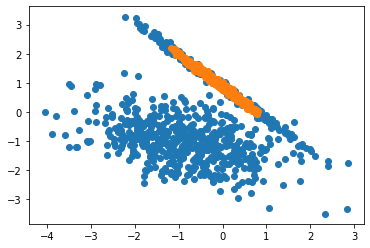

array([-1,  0])

In [29]:
from sklearn.cluster import DBSCAN


model = DBSCAN(eps=0.30, min_samples=20)
# fit model and predict clusters
yhat = model.fit_predict(X)
# retrieve unique clusters
clusters = unique(yhat)
# create scatter plot for samples from each cluster
for cluster in clusters:
	# get row indexes for samples with this cluster
	row_ix = where(yhat == cluster)
	# create scatter of these samples
	pyplot.scatter(X[row_ix, 0], X[row_ix, 1])
# show the plot
pyplot.show()
clusters


#eps value is too small, and with the mininmum of 20 points to be considered closed,
#only one cluster is identified

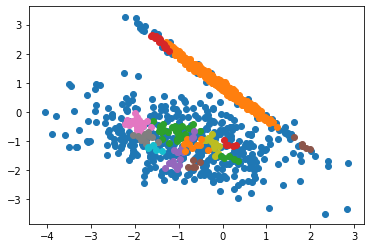

array([-1,  0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14])

In [30]:
model = DBSCAN(eps=0.30, min_samples=5)
# fit model and predict clusters
yhat = model.fit_predict(X)
# retrieve unique clusters
clusters = unique(yhat)
# create scatter plot for samples from each cluster
for cluster in clusters:
	# get row indexes for samples with this cluster
	row_ix = where(yhat == cluster)
	# create scatter of these samples
	pyplot.scatter(X[row_ix, 0], X[row_ix, 1])
# show the plot
pyplot.show()
clusters

as 5 points may already form a cluster, too many clusters are identified
thus, min_samples should be selected with consideration of possible number of clusters

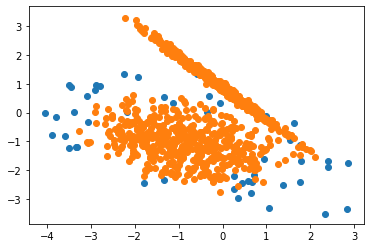

array([-1,  0])

In [31]:

model = DBSCAN(eps=0.90, min_samples=20)
# fit model and predict clusters
yhat = model.fit_predict(X)
# retrieve unique clusters
clusters = unique(yhat)
# create scatter plot for samples from each cluster
for cluster in clusters:
    # get row indexes for samples with this cluster
    row_ix = where(yhat == cluster)
    # create scatter of these samples
    pyplot.scatter(X[row_ix, 0], X[row_ix, 1])
# show the plot
pyplot.show()
clusters

And this example shows what happens, when eps is too large - all data points may end up in one cluster.

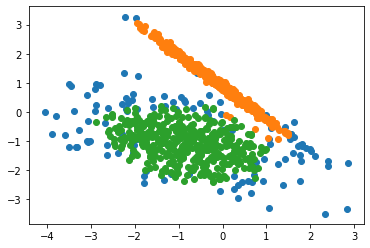

array([-1,  0,  1])

In [32]:
model = DBSCAN(eps=0.70, min_samples=20)
# fit model and predict clusters
yhat = model.fit_predict(X)
# retrieve unique clusters
clusters = unique(yhat)
# create scatter plot for samples from each cluster
for cluster in clusters:
	# get row indexes for samples with this cluster
	row_ix = where(yhat == cluster)
	# create scatter of these samples
	pyplot.scatter(X[row_ix, 0], X[row_ix, 1])
# show the plot
pyplot.show()
clusters

<b>K-means</b>

K-means clustering is the most commonly used clustering algorithm. This algorithm tries to minimize the variance of data points within a cluster. 

Importantly, it is a <b>partitioning</b> algorithm. That is to say K-means doesn’t ‘find clusters’ it partitions your dataset into as many (assumed to be globular) chunks as you ask for by attempting to minimize intra-partition distances. 

k-means clustering is a method of vector quantization, originally from signal processing, that aims to partition n observations into k clusters in which each observation belongs to the cluster with the nearest mean (cluster centers or cluster centroid), serving as a prototype of the cluster. 

Works well on small datasets, as it has to iterate over all data points. The simplest, but not the strongest in determining real clusters. Sensitive to initialization.


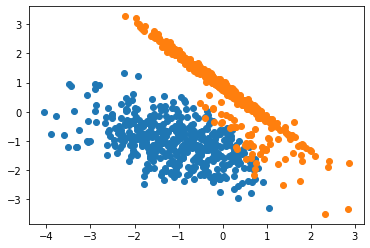

In [2]:
from sklearn.cluster import KMeans

model = KMeans(n_clusters=2)
# fit the model
model.fit(X)
# assign a cluster to each example
yhat = model.predict(X)
# retrieve unique clusters
clusters = unique(yhat)
# create scatter plot for samples from each cluster
for cluster in clusters:
	# get row indexes for samples with this cluster
	row_ix = where(yhat == cluster)
	# create scatter of these samples
	pyplot.scatter(X[row_ix, 0], X[row_ix, 1])
# show the plot
pyplot.show()

In [3]:
distortions = []
K = range(1,10)
for k in K:
    kmeanModel = KMeans(n_clusters=k)
    kmeanModel.fit(X)
    distortions.append(kmeanModel.inertia_)

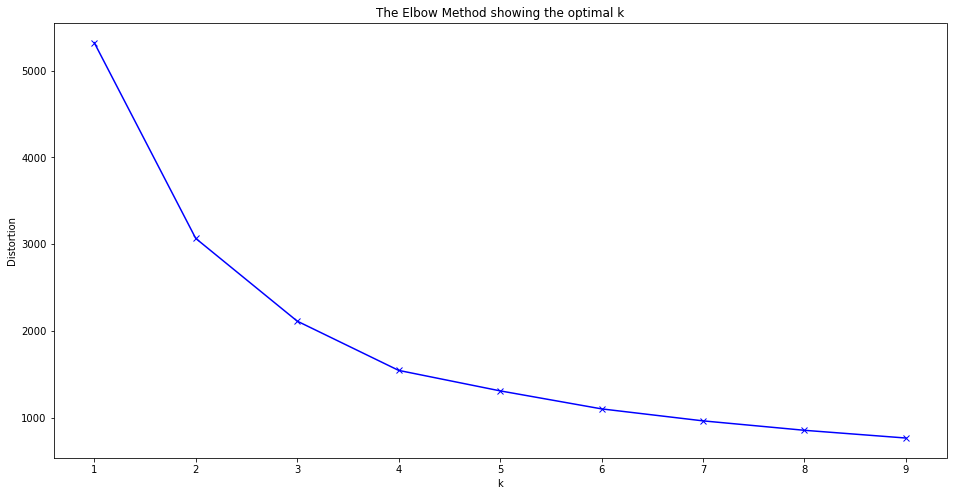

In [5]:
import matplotlib.pyplot as plt
plt.figure(figsize=(16,8))
plt.plot(K, distortions, 'bx-')
plt.xlabel('k')
plt.ylabel('Distortion')
plt.title('The Elbow Method showing the optimal k')
plt.show()

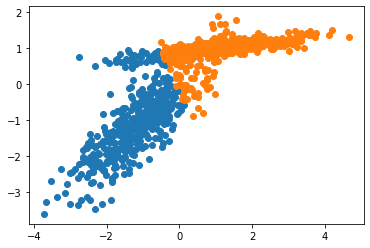

In [4]:
X, _ = make_classification(n_samples=1000, n_features=5, n_informative=2, n_redundant=3, n_clusters_per_class=1, random_state=40)

model = KMeans(n_clusters=2)
# fit the model
model.fit(X)
# assign a cluster to each example
yhat = model.predict(X)
# retrieve unique clusters
clusters = unique(yhat)
# create scatter plot for samples from each cluster
for cluster in clusters:
	# get row indexes for samples with this cluster
	row_ix = where(yhat == cluster)
	# create scatter of these samples
	pyplot.scatter(X[row_ix, 0], X[row_ix, 1])
# show the plot
pyplot.show()

In [5]:
X

array([[ 1.92543084,  1.10085589, -1.79193609, -0.50698217,  0.53358897],
       [-0.5129256 , -0.89550896,  0.40534776,  0.45848054,  0.03962988],
       [-1.71389757,  0.70763261,  1.79686244, -0.45497498, -0.98431772],
       ...,
       [ 3.09496181,  1.16147169, -2.95309109, -0.48838555,  1.04122724],
       [ 1.91135339,  1.05967808, -1.78279618, -0.48548421,  0.53968706],
       [ 0.95915465,  0.3446096 , -0.91702208, -0.14311665,  0.32731519]])

<b>Mean-Shift</b>

Mean shift clustering involves finding and adapting centroids based on the density of 
examples in the feature space. Algorithm can be used for determining the number of clusters. 

The underlying idea of the Mean Shift algorithm is that there exists some probability density function from which the data is drawn, and tries to place centroids of clusters at the maxima of that density function.

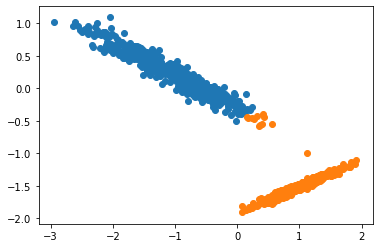

In [59]:
from sklearn.cluster import MeanShift
X, _ = make_classification(n_samples=1000, n_features=5, n_informative=2, n_redundant=3, n_clusters_per_class=1, random_state=25)

model = MeanShift()
# fit model and predict clusters
yhat = model.fit_predict(X)
# retrieve unique clusters
clusters = unique(yhat)
# create scatter plot for samples from each cluster
for cluster in clusters:
	# get row indexes for samples with this cluster
	row_ix = where(yhat == cluster)
	# create scatter of these samples
	pyplot.scatter(X[row_ix, 0], X[row_ix, 1])
# show the plot
pyplot.show()

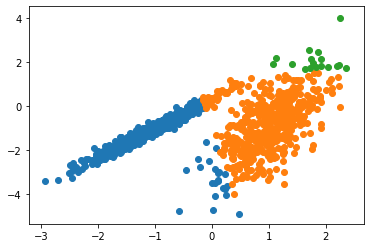

In [60]:
X, _ = make_classification(n_samples=1000, n_features=2, n_informative=2, n_redundant=0, n_clusters_per_class=1, random_state=4)
# define the model
model = MeanShift()
# fit model and predict clusters
yhat = model.fit_predict(X)
# retrieve unique clusters
clusters = unique(yhat)
# create scatter plot for samples from each cluster
for cluster in clusters:
	# get row indexes for samples with this cluster
	row_ix = where(yhat == cluster)
	# create scatter of these samples
	pyplot.scatter(X[row_ix, 0], X[row_ix, 1])
# show the plot
pyplot.show()

OPTICS algorithm

iterations of DBSCAN

We introduce a new algorithm for the purpose of cluster analysis which does not produce a clustering of a data set explicitly; <b>but instead creates an augmented ordering of the database representing its density-based clustering structure.</b> This cluster-ordering contains information which is equivalent to the density-based clusterings corresponding to a broad range of parameter settings.

Parameters
- min samples
- max eps - The maximum distance between two samples for one to be considered as in the neighborhood of the other.

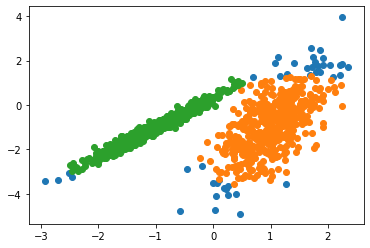

In [80]:
from sklearn.cluster import OPTICS

model = OPTICS(min_samples=30,max_eps=0.5)
# fit model and predict clusters
yhat = model.fit_predict(X)
# retrieve unique clusters
clusters = unique(yhat)
# create scatter plot for samples from each cluster
for cluster in clusters:
	# get row indexes for samples with this cluster
	row_ix = where(yhat == cluster)
	# create scatter of these samples
	pyplot.scatter(X[row_ix, 0], X[row_ix, 1])
# show the plot
pyplot.show()

Spectral Clustering

Spectral Clustering uses linear algebra. From there spectral clustering will look at the eigenvectors of the Laplacian of the graph to attempt to find a good (low dimensional) embedding of the graph into Euclidean space. This is essentially a kind of manifold learning, finding a transformation of our original space so as to better represent manifold distances for some manifold that the data is assumed to lie on. Once we have the transformed space a standard clustering algorithm is run; with sklearn the default is K-Means. 

Parameters:
- n_clusters: int, default=8; the dimension of the projection subspace.

- affinity: str or callable, default=’rbf’
How to construct the affinity matrix.
‘nearest_neighbors’ : construct the affinity matrix by computing a graph of nearest neighbors.
‘rbf’ : construct the affinity matrix using a radial basis function (RBF) kernel.
‘precomputed’ : interpret X as a precomputed affinity matrix.
‘precomputed_nearest_neighbors’ : interpret X as a sparse graph of precomputed nearest neighbors, and constructs the affinity matrix by selecting the n_neighbors nearest neighbors.

- assign_labels{‘kmeans’, ‘discretize’}, default=’kmeans’
The strategy to use to assign labels in the embedding space. There are two ways to assign labels after the laplacian embedding. k-means can be applied and is a popular choice. But it can also be sensitive to initialization. Discretization is another approach which is less sensitive to random initialization.

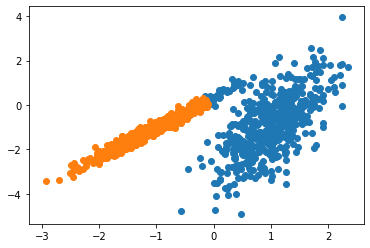

In [83]:
from sklearn.cluster import SpectralClustering

model = SpectralClustering(n_clusters=2, assign_labels='discretize')
# fit model and predict clusters
yhat = model.fit_predict(X)
# retrieve unique clusters
clusters = unique(yhat)
# create scatter plot for samples from each cluster
for cluster in clusters:
	# get row indexes for samples with this cluster
	row_ix = where(yhat == cluster)
	# create scatter of these samples
	pyplot.scatter(X[row_ix, 0], X[row_ix, 1])
# show the plot
pyplot.show()

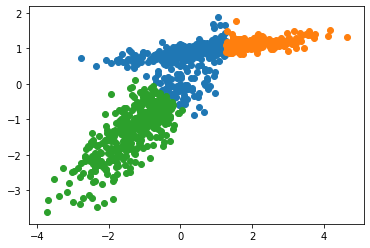

In [85]:
X, _ = make_classification(n_samples=1000, n_features=5, n_informative=2, n_redundant=3, n_clusters_per_class=1, random_state=40)
model = SpectralClustering(n_clusters=3, assign_labels='discretize')
# fit model and predict clusters
yhat = model.fit_predict(X)
# retrieve unique clusters
clusters = unique(yhat)
# create scatter plot for samples from each cluster
for cluster in clusters:
	# get row indexes for samples with this cluster
	row_ix = where(yhat == cluster)
	# create scatter of these samples
	pyplot.scatter(X[row_ix, 0], X[row_ix, 1])
# show the plot

Gaussian Mixture Models
https://scikit-learn.org/stable/modules/mixture.html#gaussian-mixture
EM algorithm